In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Start over with all data in one file.

In [2]:
df = pd.read_csv('all_data_clean.csv')
df = df.drop(['Unnamed: 0','Real GDP'], axis=1)
df

,Year,Judges,Judges w/ temp,Population,Civil Cases,Criminal Cases,Total Cases
0,1789,13,13,NaN,NaN,NaN,NaN
1,1790,15,15,NaN,NaN,NaN,NaN
2,1791,16,16,NaN,NaN,NaN,NaN
3,1792,16,16,NaN,NaN,NaN,NaN
4,1793,16,16,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
227,2016,663,673,323161011.0,274552.0,60796.0,335348.0
228,2017,663,673,324985539.0,292076.0,58618.0,350694.0
229,2018,663,673,326687501.0,277010.0,63732.0,340742.0
230,2019,663,673,328239523.0,286289.0,73115.0,359404.0


In [3]:
df['Judges per capita']= (df['Judges']/df['Population'])*10000000

In [4]:
df['Cases per Judge']= df['Total Cases']/df['Judges']

In [32]:
for i in range(len(df)):
    if df.loc[i,'Year']>=1799:
        df.loc[i,'Judges added 10 year avg']= (df.loc[i,'Judges']-df.loc[i-10,'Judges'])/10
    else:
        df.loc[i,'Judges added 10 year avg']=0

In [6]:
df_notnull=df[~df['Judges per capita'].isnull()]


In [36]:
df_notnull.head()

,Year,Judges,Judges w/ temp,Population,Civil Cases,Criminal Cases,Total Cases,Judges per capita,Cases per Judge,Judges added in 10 years,Judges added,Judges added 10 year avg
111,1900,67,67,76094000.0,NaN,NaN,NaN,8.804899,NaN,3.0,2.0,0.3
112,1901,70,70,77584000.0,NaN,NaN,NaN,9.022479,NaN,6.0,3.0,0.6
113,1902,71,71,79163000.0,NaN,NaN,NaN,8.968836,NaN,7.0,1.0,0.7
114,1903,73,73,80632000.0,NaN,NaN,NaN,9.053478,NaN,9.0,2.0,0.9
115,1904,74,74,82166000.0,NaN,NaN,NaN,9.006158,NaN,9.0,1.0,0.9


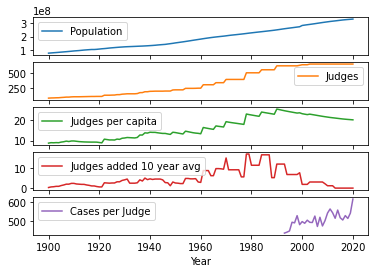

In [38]:
df_notnull.plot('Year',['Population','Judges','Judges per capita','Judges added 10 year avg','Cases per Judge'],subplots=True)

plt.show()

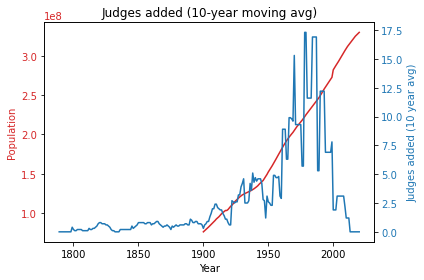

In [74]:
year = df['Year']
pop = df['Population']
judges_in_10 = df['Judges added 10 year avg']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Judges added (10-year moving avg)')


ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Judges added (10 year avg)', color=color)  
ax2.plot(year, judges_in_10, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

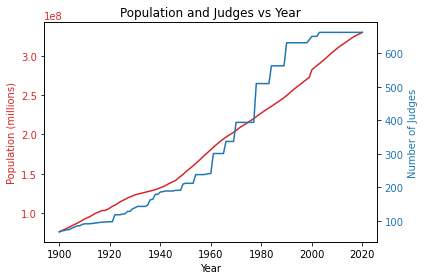

In [26]:
df_notnull=df[~df['Population'].isnull()]


year = df_notnull['Year']
pop = df_notnull['Population']
judges = df_notnull['Judges']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Population and Judges vs Year')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Number of Judges', color=color)  
ax2.plot(year, judges, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

In [45]:
np.full(28,20)

array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20])

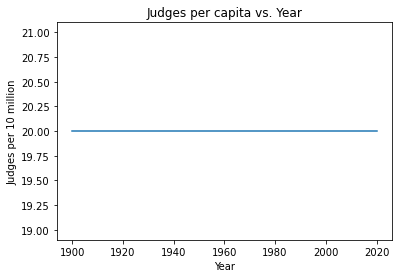

In [51]:
df_notnull=df[~df['Population'].isnull()]


year = df_notnull['Year']
judges_per_capita = np.full(len(year),20)

color = 'tab:blue'
plt.xlabel('Year')
plt.ylabel('Judges per 10 million')
plt.plot(year, judges_per_capita, color=color)
#plt.tick_params(axis='y')
plt.title('Judges per capita vs. Year')


fig.tight_layout()  
plt.show()

Federal District Court Judges have been added throughout the 20th century to keep pace with population. In 2003, this trend stopped, and no new judges have been added since then.

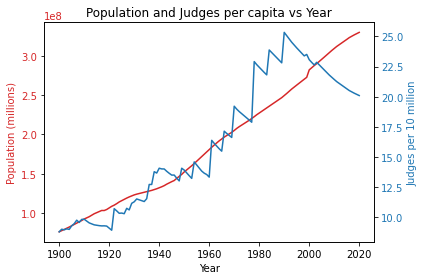

In [52]:

year = df['Year']
pop = df['Population']
judges_per = df['Judges per capita']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population (millions)', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Population and Judges per capita vs Year')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Judges per 10 million', color=color)  
ax2.plot(year, judges_per, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

Throughout the 20th century, the number of judges per 10 million citizens has risen. Since 1990, judges per 10 million citizens has fallen. In 1990, that number was about 25. Now it is 20, a number last seen in about 1980.

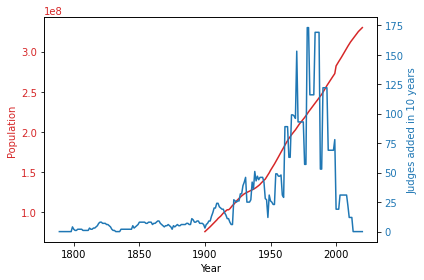

In [29]:
year = df['Year']
pop = df['Population']
judges_in_10 = df['Judges added in 10 years']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(year, pop, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Judges added in 10 years', color=color)  
ax2.plot(year, judges_in_10, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

The rate of creating new judgeships has been falling precipitously since about 1980. It has now fallen to zero, since no new judgeships have been created since 2003. Even in the 19th century, small non-zero numbers of judges were appointed when the population of the U.S. was less than a quarter of what it is today. 

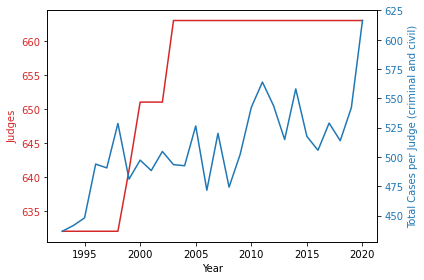

In [17]:
df_notnull=df[~df['Cases per Judge'].isnull()]


year = df_notnull['Year']
judges = df_notnull['Judges']
pop = df_notnull['Population']
cases_per_judge = df_notnull['Cases per Judge']


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Judges', color=color)
ax1.plot(year, judges, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.title('Cases per Judge vs. Year')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Total Cases per Judge (criminal and civil)', color=color)  
ax2.plot(year, cases_per_judge, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

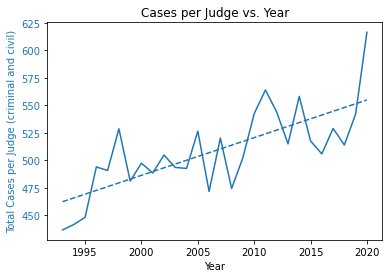

In [24]:
df_notnull=df[~df['Cases per Judge'].isnull()]


year = df_notnull['Year']
judges = df_notnull['Judges']
pop = df_notnull['Population']
cases_per_judge = df_notnull['Cases per Judge']

z = np.polyfit(year, cases_per_judge, 1)
p = np.poly1d(z)

color = 'tab:blue'
plt.xlabel('Year')
plt.ylabel('Total Cases per Judge (criminal and civil)', color=color)
plt.plot(year, cases_per_judge, color=color)
plt.tick_params(axis='y', labelcolor=color)
plt.title('Cases per Judge vs. Year')

plt.plot(year,p(year),'--')


fig.tight_layout()  
plt.show()

In [55]:
df.columns

Index(['Year', 'Judges', 'Judges w/ temp', 'Population', 'Civil Cases',
       'Criminal Cases', 'Total Cases', 'Judges per capita', 'Cases per Judge',
       'Judges added in 10 years', 'Judges added', 'Judges added 10 year avg'],
      dtype='object')

In [57]:
df.loc[df['Year']==2003,'Cases per Judge']


214    493.53092
Name: Cases per Judge, dtype: float64

In 2003, the last year judges were added, the number of cases per judge was about 500.

In [71]:
cases = (float(df.loc[df['Year']==2020,'Total Cases']) + float(df.loc[df['Year']==2019,'Total Cases']) + float(df.loc[df['Year']==2018,'Total Cases'])) / 3
cases_per_judge = df.loc[df['Year']==2003,'Cases per Judge']
projected_judge_number = int(float(cases) / float(cases_per_judge))
projected_judge_number


748

In [73]:
gap = projected_judge_number - int(df.loc[df['Year']==2020,'Judges'])
gap

85